In [3]:
%load_ext autoreload
%autoreload 2}

In [4]:
import numpy as np

import pyvista
import trimesh

import openep
from openep import io as openep_io
from openep import case as openep_case
from openep import mesh_routines as openep_mesh
from openep import case_routines as case_routines
from openep import draw_routines as draw



In [5]:
pyvista.set_jupyter_backend('ipygany')

# 1. Make openep.case.Case.create_mesh use PyVista rather than TriMesh - Done!

In [4]:
filename = "/Users/paul/github/openep-py/examples/data/new_dataset_2.mat"

In [5]:
case = openep.io.load_case(filename)

In [15]:
def create_mesh(
    case, vertex_norms: bool = True, recenter: bool = True, back_faces: bool = True
):
    """
    Create a new mesh object from the stored nodes and indices

    Args:
        vertex_norms: if True, calculate vertex normals in the mesh
        recenter: if True, recenter the mesh on the origin
        back_faces: if True, calculate back face triangles
    """
    if back_faces:
        inds_inverted = case.indices[:, [0, 2, 1]]
        inds = np.vstack(
            [case.indices, inds_inverted]
        )  # include each triangle twice for both surfaces
    else:
        inds = case.indices

    mesh = trimesh.Trimesh(case.nodes, inds, process=False, parent_obj=case)

    if vertex_norms:
        _ = mesh.vertex_normals  # compute vertex normals

    if recenter:
        mesh.apply_translation(
            -mesh.centroid
        )  # recenter mesh to origin, helps with lighting in default scene

    return mesh


In [50]:
tm_mesh = create_mesh(case, recenter=False, back_faces=False, vertex_norms=False)

In [209]:
points = case.nodes
triangles = case.indices.astype(int)  # each triangle is defined by three vertices

num_points_per_face = np.full(shape=(len(triangles)), fill_value=3, dtype=int)  # all faces have three vertices
faces = np.concatenate([num_points_per_face[:, np.newaxis], triangles], axis=1)

pv_mesh = pyvista.PolyData(points, faces)

In [65]:
indices = case.indices.astype(int)
num_points_per_face = np.full(shape=(len(indices)), fill_value=3, dtype=int)  # all faces have three vertices
faces = np.concatenate([num_points_per_face[:, np.newaxis], indices], axis=1)

In [66]:
faces

array([[    3,  5343,  7474,  7523],
       [    3,  7976,  4159,  4138],
       [    3,  7953,  5780, 12295],
       ...,
       [    3, 10283, 10270, 14360],
       [    3, 10283, 14360, 14361],
       [    3, 14380,  6871, 14364]])

In [327]:
tm_mesh._kwargs

{'parent_obj': new_dataset_2.mat( nodes: (14383, 3) indices: (16942, 3) fields: ('act', 'bip', 'uni', 'imp', 'frc') )}

In [330]:
tm_mesh.vertex_normals

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.84543579, -0.465814  , -0.26125781],
       [ 0.97887202, -0.00126517, -0.20446999],
       ...,
       [-0.85332733,  0.35633213,  0.38060462],
       [ 0.27711732, -0.19117224, -0.94162581],
       [ 0.10340065, -0.05367752, -0.99319033]])

In [335]:
pv_mesh.point_normals

pyvista_ndarray([[ 0.        ,  0.        ,  0.        ],
                 [ 0.84513116, -0.46618986, -0.2615727 ],
                 [ 0.98033404,  0.00368209, -0.1973111 ],
                 ...,
                 [-0.85600066,  0.3372743 ,  0.39180207],
                 [ 0.29737934, -0.20815478, -0.9317924 ],
                 [ 0.09867398, -0.048568  , -0.9939339 ]], dtype=float32)

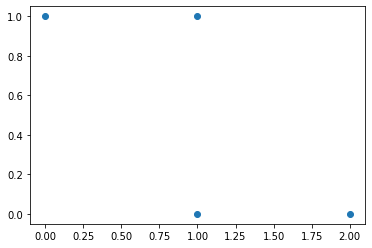

In [15]:
import matplotlib.pyplot as plt
plt.scatter(points.T[0], points.T[1])

In [117]:
tm_mesh.faces

TrackedArray([[ 5343,  7474,  7523],
              [ 7976,  4159,  4138],
              [ 7953,  5780, 12295],
              ...,
              [10283, 10270, 14360],
              [10283, 14360, 14361],
              [14380,  6871, 14364]])

In [120]:
tm_mesh.vertices

TrackedArray([[ 46.451, -98.879, 155.286],
              [ 38.777, -94.997, 121.448],
              [ 37.268, -69.189, 141.284],
              ...,
              [-62.585, -77.163, 133.982],
              [-63.766, -76.47 , 119.425],
              [-64.5  , -75.396, 119.241]])

In [118]:
pv_mesh.faces.reshape(-1, 4)[:, 1:]

array([[ 5343,  7474,  7523],
       [ 7976,  4159,  4138],
       [ 7953,  5780, 12295],
       ...,
       [10283, 10270, 14360],
       [10283, 14360, 14361],
       [14380,  6871, 14364]])

# 2. Replace get_anatomical_structures, get_free_boundaries, with PyVista - Done!

In [14]:
filename = "/Users/paul/github/openep-py/examples/data/new_dataset_2.mat"

In [5]:
case = openep.io.load_case(filename)

In [7]:
mesh = case.create_mesh(
    vertex_norms=False,
    recenter=False,
    back_faces=False
)

In [114]:
(tm_mesh.faces == mesh.faces.reshape(-1, 4)[:, 1:]).all()

TrackedArray(True)

In [130]:
mesh.center

[-12.025000000000002, -88.4265, 133.059]

In [126]:
# Created using an old version of load_case
tm_case = openep.io.load_case(filename)

In [127]:
tm_mesh = tm_case.create_mesh(
    vertex_norms=False,
    recenter=False,
    back_faces=False
)

In [128]:
tm_mesh.faces

TrackedArray([[ 5343,  7474,  7523],
              [ 7976,  4159,  4138],
              [ 7953,  5780, 12295],
              ...,
              [10283, 10270, 14360],
              [10283, 14360, 14361],
              [14380,  6871, 14364]])

In [129]:
tm_mesh.vertices

TrackedArray([[ 46.451, -98.879, 155.286],
              [ 38.777, -94.997, 121.448],
              [ 37.268, -69.189, 141.284],
              ...,
              [-62.585, -77.163, 133.982],
              [-63.766, -76.47 , 119.425],
              [-64.5  , -75.396, 119.241]])

In [ ]:
tm_mesh.center_mass

array([  -4.87952569, -137.15706541,  189.30464945])

In [ ]:
tm_mesh.centroid

array([ -6.81453072, -85.01814967, 133.68266536])

In [132]:
# Check the meshes have the same faces
(tm_mesh.faces == mesh.faces.reshape(-1, 4)[:, 1:]).all()

TrackedArray(True)

## Create a Trimesh mesh from a pyvista mesh

In [190]:
def _create_trimesh(pyvista_mesh):
    """Convert a pyvista mesh into a trimesh mesh.

    Args:
        pyvista_mesh (pyvista.PolyData): The pyvista mesh from which the trimesh mesh will be generated
    
    Returns:
        trimesh_mesh (trimesh.Trimesh): The generated trimesh mesh
    """
    
    vertices = pyvista_mesh.points
    faces = pyvista_mesh.faces.reshape(pyvista_mesh.n_faces, 4)[:, 1:]  # ignore to number of vertices per face
    
    return tm.Trimesh(vertices, faces, process=False)


In [186]:
trimesh.Trimesh(case.nodes, case.indices)

<trimesh.Trimesh(vertices.shape=(8848, 3), faces.shape=(16942, 3))>

In [192]:
_create_trimesh(mesh).plot()

AttributeError: 'Trimesh' object has no attribute 'plot'

In [167]:
tm_mesh.vertices.shape

(14383, 3)

In [162]:
mesh.faces.reshape(-1, 4).shape

(16942, 4)

In [163]:
mesh.points.shape

(14383, 3)

In [194]:
# Creat a pyvista mesh from a trimesh mesh
pyvista.wrap(tm_mesh)

PolyData,Information
N Cells,16942
N Points,14383
X Bounds,"-6.555e+01, 4.150e+01"
Y Bounds,"-1.300e+02, -4.681e+01"
Z Bounds,"1.006e+02, 1.655e+02"
N Arrays,0


## openep.draw_routines.get_freeboundaries

In [342]:
    def get_freeboundaries(mesh):
        
        freeboundary_vertex_nodes = []
        freeboundaries = []

        tri_outline = mesh.outline().to_dict()
        mesh_outline_entities = mesh.outline().entities
        no_of_freeboundaries = len(mesh_outline_entities)

        # Find all the freeboundary facets
        for i in range(no_of_freeboundaries):
            freeboundary_vertex_nodes.append(tri_outline["entities"][i]["points"])

            # creating an array of fb values with the index of the points
            for j in range(len(freeboundary_vertex_nodes[i]) - 1):
                freeboundaries.append(
                    [freeboundary_vertex_nodes[i][j], freeboundary_vertex_nodes[i][j + 1]]
                )

        freeboundaries = np.array(freeboundaries).astype(np.int64)

        # TODO: this should return a numpy array rather than a dictionary
        return {"freeboundary": freeboundaries}
    

In [341]:
def new_get_freeboundaries(mesh):

    """Gets the freeboundary/outlines of the 3-D mesh and returns the indices.
    
    Args:
        mesh (pyvista.PolyData): Open mesh for which the free boundaries will be determined.

    Returns:
        freeboundaies_info (dict):
            * freeboundary, Nx2 numpy array of indices of neighbouring points in the free boundaries
    """

    tm_mesh = openep.draw_routines._create_trimesh(mesh)
    
    # extract the boundary information
    boundaries = tm_mesh.outline()
    boundaries_lines = boundaries.entities

    # determine information about each boundary
    all_boundaries_nodes = np.concatenate([line.points for line in boundaries_lines])
    n_nodes_per_boundary = np.asarray([line.points.size for line in boundaries_lines])
    n_boundaries = tm_mesh.outline().entities.size

    # Create an array pairs of neighbouring nodes for each boundary
    free_boundaries = np.vstack([all_boundaries_nodes[:-1], all_boundaries_nodes[1:]]).T

    # Ignore the neighbours that are part of different boundaries
    keep_neighbours = np.full_like(free_boundaries[:, 0], fill_value=True, dtype=bool)
    keep_neighbours[n_nodes_per_boundary[:-1].cumsum()-1] = False
    free_boundaries = free_boundaries[keep_neighbours]
    
    # TODO: return a tuple of numpy arrays rather than a dictionary
    return {
        "freeboundary": free_boundaries,
        "n_boundaries": n_boundaries,
        "n_nodes_per_boundary": n_nodes_per_boundary,
    }


In [ ]:
(get_freeboundaries(tm_mesh)['freeboundary'] == new_get_freeboundaries(mesh)['freeboundary']).all()

True

In [7]:
free_boundaries = openep.draw_routines.get_freeboundaries(mesh)

## openep.def get_freeboundary_points(tri, fb):


In [346]:
def get_freeboundary_points(tri, fb):
    """
    Returns the coords of the vertices of the freeboundary/outlines.
    Args:
        tri (obj): Trimesh Object containing a triangular 3D mesh.


    Returns:
        float: coords, mx3 Array of coords of the vertices of the freeboundary/outlines.
    """

    trimesh_points = tri.vertices
    fb = fb[:, 0]
    coords = np.array(list(trimesh_points[fb])).astype(np.float64)

    return coords

In [361]:
# return this in get_freeboundaries
tm_mesh.vertices[new_get_freeboundaries(mesh)['freeboundary'][:, 0]]


pyvista_ndarray([[-60.821, -79.357, 122.192],
                 [-60.195, -79.694, 122.34 ],
                 [-59.442, -80.109, 122.538],
                 ...,
                 [ 38.499, -57.564, 151.294],
                 [ 38.399, -57.336, 151.369],
                 [ 38.246, -57.02 , 151.42 ]])

In [351]:
get_freeboundary_points(tm_mesh, get_freeboundaries(tm_mesh)['freeboundary'])

array([[-60.821, -79.357, 122.192],
       [-60.195, -79.694, 122.34 ],
       [-59.442, -80.109, 122.538],
       ...,
       [ 38.499, -57.564, 151.294],
       [ 38.399, -57.336, 151.369],
       [ 38.246, -57.02 , 151.42 ]])

In [367]:
(mesh.points[new_get_freeboundaries(mesh)['freeboundary'][:, 0]] == get_freeboundary_points(tm_mesh, get_freeboundaries(tm_mesh)['freeboundary'])).all()

pyvista_ndarray(True)

In [364]:
(openep.draw_routines.get_freeboundary_points(mesh) == get_freeboundary_points(tm_mesh, get_freeboundaries(tm_mesh)['freeboundary'])).all()

TrackedArray(True)

In [365]:
openep.draw_routines.get_freeboundary_points(mesh)

TrackedArray([[-60.821, -79.357, 122.192],
              [-60.195, -79.694, 122.34 ],
              [-59.442, -80.109, 122.538],
              ...,
              [ 38.499, -57.564, 151.294],
              [ 38.399, -57.336, 151.369],
              [ 38.246, -57.02 , 151.42 ]])

In [366]:
get_freeboundary_points(tm_mesh, get_freeboundaries(tm_mesh)['freeboundary'])

array([[-60.821, -79.357, 122.192],
       [-60.195, -79.694, 122.34 ],
       [-59.442, -80.109, 122.538],
       ...,
       [ 38.499, -57.564, 151.294],
       [ 38.399, -57.336, 151.369],
       [ 38.246, -57.02 , 151.42 ]])

## openep.draw_routines.free_boundary

In [377]:
openep.draw_routines.free_boundary(mesh)['length']

[911.2752, 911.2752, 911.2752, 911.2752, 911.2752, 911.2752, 911.2752]

In [387]:
openep.draw_routines.free_boundary(mesh)['connected_freeboundary']

[array([[14336, 14327],
        [14327, 14357],
        [14357, 14320],
        [14320, 14325],
        [14325, 14339],
        [14339, 14319],
        [14319, 14326],
        [14326, 14335],
        [14335, 14322],
        [14322, 14355],
        [14355, 14354],
        [14354, 14351],
        [14351, 14334],
        [14334, 14350],
        [14350,  3618],
        [ 3618, 14333],
        [14333, 14349],
        [14349, 14321],
        [14321, 14331],
        [14331, 14369],
        [14369, 14323],
        [14323, 14344],
        [14344, 14367],
        [14367, 14332],
        [14332, 14346],
        [14346, 14345],
        [14345, 14366],
        [14366, 14375],
        [14375, 14348],
        [14348, 14374],
        [14374, 14373],
        [14373, 14380],
        [14380, 14364],
        [14364, 14372],
        [14372, 14363],
        [14363,   916],
        [  916, 14342],
        [14342, 14353],
        [14353, 14362],
        [14362, 14347],
        [14347, 14341],
        [14341, 

In [392]:
def free_boundary(tri):
    """
    Returns an array of connected free boundaries/outlines and the length of each of the freeboundary/outline.
    Args:
        tri (obj): Trimesh Object containing a triangular 3D mesh.

    Returns:
        int: connected_freeboundary, mx2 array of connectecd freeboundary indices.
        float: length, list containing the length of each of the freeboundaries/outlines.
    """

    length = []

    f_fall = openep.draw_routines.get_freeboundaries(tri)
    fb = f_fall["freeboundary"]

    test_set = np.array(list(np.zeros((fb.shape[0], fb.shape[1]))))
    test_set[:] = np.nan
    test_set[:, 0] = fb[:, 0]

    # exctracting the contents of 2nd columm fb array into the testset
    second_col_fb = list(map(lambda x: x, fb[:, 1][0 : len(fb) - 1]))  # noqa: E203
    second_col_fb.insert(0, fb[:, 1][-1])
    second_col_fb = np.array(second_col_fb)

    # Assigning the values of the second column to the 2nd column of testset
    test_set[:, 1] = second_col_fb

    # isstat
    i_start = np.where(np.diff(a=test_set, n=1, axis=1).astype(np.int64))[0]

    ff = []

    if not list(i_start):
        ff.append(np.array(fb))
        coords = openep.draw_routines.get_freeboundary_points(tri)
        length.append(openep.draw_routines.line_length(coords))
    else:
        for i in range(i_start.shape[0]):
            if i < (i_start.shape[0] - 1):
                np.array(ff.append(fb[i_start[i] : i_start[i + 1]]))  # noqa E203
                coords = openep.draw_routines.get_freeboundary_points(tri)
                length.append(openep.draw_routines.line_length(coords))
            else:
                ff.append(fb[i_start[i]:])
                coords = openep.draw_routines.get_freeboundary_points(tri)
                length.append(openep.draw_routines.line_length(coords))

    return {"connected_freeboundary": ff, "length": length}

In [477]:
from dataclasses import dataclass
from openep.draw_routines import line_length

@dataclass
class FreeBoundary:
    """Class for storing information on the free boundaries of a mesh."""
    freeboundary: np.ndarray
    free_boundary_points: np.ndarray
    n_boundaries: int
    n_nodes_per_boundary: np.ndarray
    
    def __post_init__(self):
        
        start_indices = list(np.cumsum(self.n_nodes_per_boundary[:-1] - 1))
        start_indices.insert(0, 0)
        self._start_indices = np.asarray(start_indices)

        stop_indices = start_indices[1:]
        stop_indices.append(None)
        self._stop_indices = np.asarray(stop_indices)
    
    def separate_boundaries(self):
        """
        Returns a list of numpy arrays where each array contains the indices of
        node pairs in a single free boundary.
        
        """
        
        separate_boundaries = [
            self.freeboundary[start:stop] for start, stop in zip(self._start_indices, self._stop_indices)
        ]
        
        return separate_boundaries
        

    def calculate_lengths(self):
        """
        Returns the length of the perimeter of each free boundary.
        """
        
        lengths = [
            line_length(self.free_boundary_points[start:stop]) for start, stop in zip(self._start_indices, self._stop_indices)
        ]
            
        return np.asarray(lengths)


In [10]:
# generate a FreeBoundary object
free_boundaries = openep.draw_routines.get_freeboundaries(mesh)
fb = openep.draw_routines.FreeBoundary(**free_boundaries)

In [11]:
fb.calculate_lengths()

array([ 49.54177102,  65.92530412,  67.71142462,  84.76738961,
        63.44614224, 119.60159341,  96.85545027])

In [522]:
fb.calculate_lengths()

array([ 49.5418,  65.9256,  67.7116,  84.7681,  63.4462, 119.6015,
        96.8559])

In [ ]:
              MATLAB   | Py New    | Py previous
Perimeter is: 67.994   | 67.7116   | 69.4603
Perimeter is: 97.0835  | 96.8559   | 98.9257
Perimeter is: 48.4671  | 49.5418   | 49.6852
Perimeter is: 120.3745 | 119.6015  | 122.2539
Perimeter is: 66.1018  | 65.9256   | 66.8485
Perimeter is: 82.9701  | 84.7681   | 84.9425
Perimeter is: 63.4461  | 63.4462   | 65.7998


In [482]:
for i in range(7):

    print((fb.separate_boundaries()[i] == free_boundary(mesh)['connected_freeboundary'][i]).all())

True
True
True
True
True
True
True


In [483]:
def line_length(h):
    """
    Calculates the Length of a line.

    Args:
        h (float): mx3 array of cartesian co-ordinates representing the line.

    Returns:
        float: l, mx1 array of length of the line.
    """
    #   remove any Nan values
    data = h[~np.isnan(h)].reshape(h.shape[0], h.shape[1])

    dx = np.diff(data[:, 0])
    dy = np.diff(data[:, 1])
    dz = np.diff(data[:, 2])

    length = 0
    for i in range(len(dx)):
        length = np.round(
            length + np.sqrt(np.square(dx[i]) + np.square(dy[i]) + np.square(dz[i])), 4
        )

    return length

In [485]:
line_length(fb.free_boundary_points)

911.2752

In [518]:
def new_line_length(points):
    """
    Calculates the length of a line defined by the positions of a sequence of points.

    Args:
        points (ndarray): Nx3 array of cartesian coordinates of points along the line.

    Returns:
        length (float): length of the line
    """
    
    distance_between_neighbours = np.sqrt(np.sum(np.square(np.diff(points, axis=0)), axis=1))
    total_distance = np.sum(distance_between_neighbours)
    
    return float(total_distance)


In [497]:
points = fb.free_boundary_points

In [506]:
np.square(np.diff(points, axis=0)).shape

(761, 3)

In [519]:
new_line_length(points)

911.2735622617231

In [520]:
line_length(points)

911.2752

## openep.draw_routines.draw_free_boundaries

In [8]:
filename = "/Users/paul/github/openep-py/examples/data/new_dataset_2.mat"

In [9]:
case = openep.io.load_case(filename)

In [10]:
mesh = case.create_mesh(
    vertex_norms=False,
    recenter=False,
    back_faces=False
)

In [11]:
# generate a FreeBoundary object
free_boundaries = openep.draw_routines.get_freeboundaries(mesh)
fb = openep.draw_routines.FreeBoundary(mesh, **free_boundaries)

In [12]:
plotter = openep.draw_routines.draw_free_boundaries(fb)
plotter.background_color = "White"
plotter.show()

/usr/local/Caskroom/miniconda/base/envs/openep/lib/python3.8/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  warnings.warn(


Scene(background_color='#ffffff', camera={'position': [71.80763645292058, -4.5938635470794225, 216.89163645292…

In [13]:
fb.calculate_areas()

array([154.77351552, 260.17517408, 331.54873862, 508.78222806,
       282.03046195, 949.77322547, 634.81424774])

In [27]:
openep.draw_routines.get_anatomical_structures(case, plot=True)

Perimeter is : 49.68522832633961 | Area is: 154.8059
Perimeter is : 66.84852078270887 | Area is: 260.2948
Perimeter is : 69.46032742297406 | Area is: 331.543
Perimeter is : 84.94254954156067 | Area is: 508.7591
Perimeter is : 65.79977114058096 | Area is: 282.0847
Perimeter is : 122.25388486810391 | Area is: 949.7754
Perimeter is : 98.92567586023614 | Area is: 634.8818


/usr/local/Caskroom/miniconda/base/envs/openep/lib/python3.8/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  warnings.warn(


Scene(background_color='#ffffff', camera={'position': [71.80763645292058, -4.5938635470794225, 216.89163645292…

{'FreeboundaryPoints': [array([[-60.821, -79.357, 122.192],
         [-60.195, -79.694, 122.34 ],
         [-59.442, -80.109, 122.538],
         [-59.263, -80.265, 122.629],
         [-58.315, -81.126, 122.733],
         [-57.638, -81.769, 123.   ],
         [-56.849, -82.438, 123.481],
         [-56.615, -82.782, 123.734],
         [-56.59 , -83.712, 124.374],
         [-56.49 , -83.681, 124.712],
         [-56.754, -84.043, 125.185],
         [-56.783, -84.184, 125.357],
         [-57.055, -85.111, 126.15 ],
         [-56.788, -85.197, 127.456],
         [-56.758, -85.223, 127.632],
         [-56.047, -84.65 , 128.994],
         [-55.625, -83.961, 130.121],
         [-55.596, -83.743, 130.737],
         [-55.744, -82.148, 132.425],
         [-55.841, -81.881, 132.668],
         [-55.917, -81.69 , 132.851],
         [-57.411, -79.802, 132.927],
         [-58.067, -79.14 , 132.941],
         [-58.525, -78.836, 133.221],
         [-59.048, -78.823, 133.636],
         [-60.48 , -78.434, 

## Get the free boundaries using PyVista
Doesn't currently work!!

In [ ]:
tm_mesh.outline()

In [212]:
# Extract the edges at the boundaries
edges = mesh.extract_feature_edges(
    feature_angle=0,
    boundary_edges=True,
    manifold_edges=False,
    feature_edges=False,
    non_manifold_edges=False
)

# Find all connected components
conn = edges.connectivity(largest=False)

# Plot the points at each boundary
for region in np.unique(conn['RegionId']):
    
    region_points = conn.points[conn['RegionId']==region]
        
    plotter = pyvista.Plotter(off_screen=True)
    plotter.set_background('white')
    plotter.add_points(region_points, color='black')
    plotter.screenshot(f'region{region}.png')
    plotter.close()

In [218]:
edges

PolyData,Information
N Cells,762
N Points,762
X Bounds,"-6.555e+01, 4.135e+01"
Y Bounds,"-1.078e+02, -4.681e+01"
Z Bounds,"1.006e+02, 1.634e+02"
N Arrays,0


# 3. Remove get_mesh and enforce all mesh functions are passed a mesh, not a Case object

In [4]:
filename = "/Users/paul/github/openep-py/examples/data/new_dataset_2.mat"

In [5]:
case = openep.io.load_case(filename)

In [6]:
mesh = case.create_mesh(
    vertex_norms=False,
    recenter=False,
    back_faces=False
)

## Make sure repair works

In [25]:
import pymeshfix

In [27]:
    mf = pymeshfix.MeshFix(mesh)
    mf.repair()
    mf.mesh

93
95
108
160
67
141
84


PolyData,Information
N Cells,24782
N Points,12393
X Bounds,"-6.555e+01, 4.150e+01"
Y Bounds,"-1.222e+02, -4.681e+01"
Z Bounds,"1.006e+02, 1.655e+02"
N Arrays,0


## create graph from pyvista

In [14]:
mesh.faces

array([    3,  5343,  7474, ..., 14380,  6871, 14364])

In [21]:
# This fails if there is no path between the two vertices
mesh.geodesic(start_vertex=5343, end_vertex=7474, keep_order=True, inplace=False)

PolyData (0x7fd8d84af640)
  N Cells:	1
  N Points:	2
  X Bounds:	3.695e+00, 4.029e+00
  Y Bounds:	-8.395e+01, -8.276e+01
  Z Bounds:	1.638e+02, 1.640e+02
  N Arrays:	1

In [17]:
mesh.geodesic(start_vertex=0, end_vertex=7474, keep_order=True, inplace=False)

ValueError: Number of scalars (1) must match either the number of points (0) or the number of cells (0).

In [93]:
import networkx as nx

In [304]:
def create_edge_graph(mesh: pyvista.PolyData) -> nx.Graph:
    """
    Create a Graph object of the mesh's edges with the length stored as property 'length'.
    """
    
    # Avoid creating the graph unnecessarily
    if hasattr(mesh, "_graph"):
        return mesh._graph
    
    faces = mesh.faces.reshape(-1, 4)[:, 1:]

    edges = np.vstack(
        [
            faces[:, :2],
            faces[:, 1:3],
            faces[:, ::2],
        ]
    )
    edges.sort()  # ensure the lower index is in the first column
    unique_edges = np.unique(edges, axis=0)
    
    edge_lengths = np.linalg.norm(mesh.points[unique_edges[:, 0]] - mesh.points[unique_edges[:, 1]], axis=1)

    graph = nx.Graph()
    graph.add_nodes_from(np.arange(mesh.n_points))  # ensure all nodes are present
    for edge, length in zip(unique_edges, edge_lengths):
        graph.add_edge(*edge, length=length)
        
    mesh._graph = graph

    return graph


In [23]:
graph = openep.mesh_routines.create_edge_graph(mesh)

## Make sure triangles are selected correctly

### Check the areas using trimesh

In [67]:
sphere = trimesh.creation.icosphere()

In [59]:
sphere.triangles[..., 0].mean(axis=1) <= 0

array([ True,  True,  True, ..., False, False, False])

In [68]:
sphere.area_faces

array([0.00908284, 0.00911426, 0.00911426, ..., 0.01158177, 0.01158177,
       0.01173841])

In [53]:
sphere.triangles

array([[[-0.52573111,  0.85065081,  0.        ],
        [-0.61564202,  0.78384304,  0.08108629],
        [-0.48444164,  0.86492934,  0.13120038]],

       [[-0.61564202,  0.78384304,  0.08108629],
        [-0.69378048,  0.70204644,  0.16062204],
        [-0.57125166,  0.79264923,  0.21302287]],

       [[-0.48444164,  0.86492934,  0.13120038],
        [-0.57125166,  0.79264923,  0.21302287],
        [-0.43388856,  0.86266848,  0.25989191]],

       ...,

       [[ 0.91298249,  0.39960705, -0.08232358],
        [ 0.85065081,  0.52573111,  0.        ],
        [ 0.91298249,  0.39960705,  0.08232358]],

       [[ 0.96386126,  0.2664047 ,  0.        ],
        [ 0.91298249,  0.39960705,  0.08232358],
        [ 0.95105652,  0.26286556,  0.16245985]],

       [[ 0.91298249,  0.39960705, -0.08232358],
        [ 0.91298249,  0.39960705,  0.08232358],
        [ 0.96386126,  0.2664047 ,  0.        ]]])

In [55]:
(sphere.vertices[sphere.faces] == sphere.triangles).all()

TrackedArray(True)

### Now reproduce with pyvista

In [62]:
sphere = pyvista.wrap(sphere)
faces = sphere.faces.reshape(-1, 4)[:, 1:]
triangles = sphere.points[faces]

In [66]:
areas = sphere.compute_cell_sizes(
    length=False,
    area=True,
    volume=False,
)['Area']
areas

array([0.00908284, 0.00911426, 0.00911426, ..., 0.01158177, 0.01158177,
       0.01173841])

# 4. Remove usage of TriMesh in repair_mesh

# 5. Remove create_edge_graph

# 6. Replace calculate_vertex_path with PyVista's built-in method geodesic

# 7. Replace calculate_vertex_distance with PyVista's built-in geodesic.GetLength

# 8. Replcace calculate_per_triangle_field with PyVista

# 9. Replace calculate_mesh_volume with PyVista

# 10. Replace calculate_field_area with PyVista

In [67]:
pv_mesh.compute_cell_sizes()['Area']

array([0.63103974, 1.56196711, 0.60041778, ..., 0.71467247, 0.15796176,
       0.11111188])

In [68]:
tm_mesh.area_faces

array([0.63103974, 1.56196711, 0.60041778, ..., 0.71467247, 0.15796176,
       0.11111188])

In [ ]:
# Use this in test_mesh_routines.test_calculate_field_area to determine xbelow
triangles = sphere.points[sphere.faces.reshape(-1, 4)[:, 1:]]

# 11. Replace calculate_point_distance_max with scipy.spatial.distance.cdist

In [8]:
import trimesh
tm_sphere = trimesh.creation.icosphere()

In [11]:
tm_sphere.vertices[:, 1]

TrackedArray([ 0.85065081,  0.85065081, -0.85065081, -0.85065081,
              -0.52573111,  0.52573111, -0.52573111,  0.52573111,
               0.        ,  0.        ,  0.        ,  0.        ,
               1.        , -1.        , -0.80901699, -0.80901699,
               0.80901699,  0.80901699,  0.        , -0.80901699,
              -0.80901699,  0.80901699,  0.80901699,  0.        ,
               0.5       , -0.5       , -0.30901699,  0.30901699,
               0.5       , -0.5       , -0.30901699,  0.30901699,
               0.        ,  0.5       , -0.5       , -0.30901699,
               0.30901699,  0.5       , -0.5       , -0.30901699,
               0.30901699,  0.        ,  0.96193836,  0.96193836,
              -0.96193836, -0.96193836, -0.86266848, -0.69378048,
              -0.95105652, -0.86266848, -0.69378048, -0.95105652,
              -0.85065081,  0.86266848,  0.69378048,  0.95105652,
               0.86266848,  0.69378048,  0.95105652,  0.85065081,
          

# Replace draw_map with pyvista

In [6]:
filename = "/Users/paul/github/openep-py/examples/data/new_dataset_2.mat"

In [7]:
case = openep.io.load_case(filename)

In [8]:
mesh = case.create_mesh(
    vertex_norms=False,
    recenter=False,
    back_faces=False
)

In [9]:
tm_mesh = openep.draw_routines._create_trimesh(mesh)

In [12]:
tm_mesh.outline().entities

array([<trimesh.path.entities.Line object at 0x7fe5987ede20>,
      dtype=object)

# Create test files

In [85]:
def create_cube():
    
    cube = trimesh.creation.box()
    
    points = cube.vertices
    triangles = cube.faces

    num_points_per_face = np.full(shape=(len(triangles)), fill_value=3, dtype=int)  # all faces have three vertices
    faces = np.concatenate([num_points_per_face[:, np.newaxis], triangles], axis=1)
    
    return pyvista.PolyData(points, faces)

In [86]:
def create_sphere():
    
    sphere = trimesh.creation.icosphere()
    
    points = sphere.vertices
    triangles = sphere.faces

    num_points_per_face = np.full(shape=(len(triangles)), fill_value=3, dtype=int)  # all faces have three vertices
    faces = np.concatenate([num_points_per_face[:, np.newaxis], triangles], axis=1)
    
    return pyvista.PolyData(points, faces)
        

In [87]:
def create_broken_sphere():
    
    sphere = trimesh.creation.icosphere()
    broken_sphere = trimesh.Trimesh(sphere.vertices, sphere.faces[30:])
        
    points = broken_sphere.vertices
    triangles = broken_sphere.faces

    num_points_per_face = np.full(shape=(len(triangles)), fill_value=3, dtype=int)  # all faces have three vertices
    faces = np.concatenate([num_points_per_face[:, np.newaxis], triangles], axis=1)
    
    return pyvista.PolyData(points, faces)


In [101]:
cube = create_cube()
cube.save("../openep/_simple_meshes/PLY/cube.ply")


In [102]:
sphere = create_sphere()
sphere.save("../openep/_simple_meshes/PLY/sphere.ply")


In [103]:
broken_sphere = create_broken_sphere()
broken_sphere.save("../openep/_simple_meshes/PLY/broken_sphere.ply")

In [6]:
from openep._simple_meshes.simple_meshes import CUBE, SPHERE, BROKEN_SPHERE

In [7]:
cube = pyvista.read(CUBE)
sphere = pyvista.read(SPHERE)
broken_sphere = pyvista.read(BROKEN_SPHERE)
